In [1]:
%matplotlib widget

from sklearn.datasets import load_diabetes
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [50]:
diabetes = load_diabetes(scaled=True) # enable Feature Scaling
data = diabetes.data # (m x n) (examples x features)

severity = diabetes.target.reshape((-1,1)) # output of severity of diabetes or disease progression
# mx1

print(data.dtype, severity.dtype) # show datatypes of input and output
print(data.shape) # show shape of input
print(diabetes.feature_names) # show feature names associated with input
print(data) # show unscaled data itself

float64 float64
(442, 10)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


In [51]:
def predict(w,b,x):
    m = x.shape[0] # number of training examples
    n = x.shape[1] # number of features
    
    prediction = np.matmul(x, w) + b
    return prediction

In [52]:
def mse_cost(w,b,x,y):
    m = x.shape[0] # number of training examples
    n = x.shape[1] # number of features
    
    prediction = np.matmul(x, w) + b
    error = prediction - y
    error = error.reshape((-1)) # make it m (1d array) from mx1
    
    return np.dot(error, error) / (2*m)

In [53]:
def compute_gradient(w,b,x,y):
    m = x.shape[0] # number of training examples
    n = x.shape[1] # number of features

    # w = nx1
    # b = 1
    # x = mxn
    # y = mx1
    
    prediction = np.matmul(x, w) + b # mx1
    error = prediction - y # mx1
    
    xT = np.transpose(x) # nxm
    dw = np.matmul(xT, error) / m # nx1
    db = np.sum(error) / m # 1

    return dw, db

Let's do some feature engineering. We will start with some polynomial regression and make all squared terms from the original features.

In [54]:
data2 = data**2 # square each feature
data = np.hstack((data,data2)) # add new features 
print(data.shape) # 20 features now = 2x features
print(data) # show new data

(442, 20)
[[ 3.80759064e-02  5.06801187e-02  6.16962065e-02 ...  6.71982227e-06
   3.96308006e-04  3.11385733e-04]
 [-1.88201653e-03 -4.46416365e-02 -5.14740612e-02 ...  1.55972729e-03
   4.66920033e-03  8.50158677e-03]
 [ 8.52989063e-02  5.06801187e-02  4.44512133e-02 ...  6.71982227e-06
   8.18709085e-06  6.72382480e-04]
 ...
 [ 4.17084449e-02  5.06801187e-02 -1.59062628e-02 ...  1.22755759e-04
   2.19797201e-03  2.39962721e-04]
 [-4.54724779e-02 -4.46416365e-02  3.90621530e-02 ...  7.05413600e-04
   1.98280769e-03  6.72382480e-04]
 [-4.54724779e-02 -4.46416365e-02 -7.30303027e-02 ...  1.55972729e-03
   1.78211799e-05  9.39060506e-06]]


In [55]:
m = data.shape[0] # number of training examples
n = data.shape[1] # number of features

w = np.zeros((n,1)) # n features
b = 0
# initialize model parameters

a=0.6
max_iterations=3000
iteration = np.empty(0, dtype=np.uint)
costs = np.empty(0)

for i in range(max_iterations):
    dw, db = compute_gradient(w,b,data,severity)
    
    w-=a*dw
    b-=a*db
    # update the weights
    
    iteration = np.append(iteration, i)
    current_cost = mse_cost(w,b,data,severity)
    costs = np.append(costs, current_cost)
    # add to array for visualization

Also I tried running gradient descent without feature scaling and the weights basically exploded to huge values and after just a few iterations, gradient descent stopped working. 
These are called exploding gradients.
Eventually, I just re-enabled feature scaling and gradient descent works nicely again.

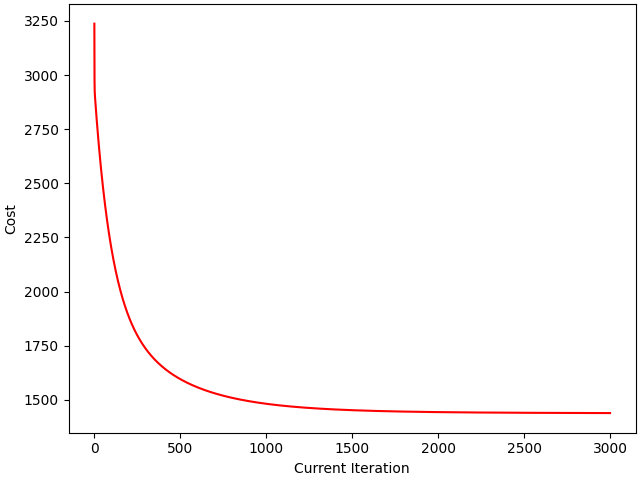

In [56]:
iteration = iteration[1:]
costs = costs[1:]

# graph the cost after updating the model
fig, cost_graph = plt.subplots(layout='constrained')

cost_graph.set_xlabel("Current Iteration")
cost_graph.set_ylabel("Cost")

cost_graph.plot(iteration, costs, color="r")

Cost Graph over Gradient Descent Iterations. 

In [57]:
print("w:", w.reshape((-1)))
print("b:", b)
print("1st Cost:", costs[0])
print("Nth Cost:", costs[-1])

w: [  -3.88169746 -231.11239831  520.76248206  318.36283238  -58.41491842
 -116.94323752 -207.50046517  120.17486083  449.79813919   88.61947066
   25.60566107   -1.05198219   43.75134374   22.96950618    3.33296882
   -6.73037625   -2.27510733   -2.12313457   -5.75404792   41.00947567]
b: 151.86497914756933
1st Cost: 3237.7247341311736
Nth Cost: 1438.9356792861915


Only around 20 iterations are needed with feature scaling in this situation. It looks way too short. 